<a href="https://colab.research.google.com/github/Sudhakaran-Sudhan/Prodigy/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [4]:
print(data.head())
print(data.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [5]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
data = data.drop(['CustomerID'], axis=1)

In [7]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [9]:
print(pd.DataFrame(scaled_data, columns=data.columns).head())

     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0 -1.128152 -1.424569           -1.738999               -0.434801
1 -1.128152 -1.281035           -1.738999                1.195704
2  0.886405 -1.352802           -1.700830               -1.715913
3  0.886405 -1.137502           -1.700830                1.040418
4  0.886405 -0.563369           -1.662660               -0.395980


In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


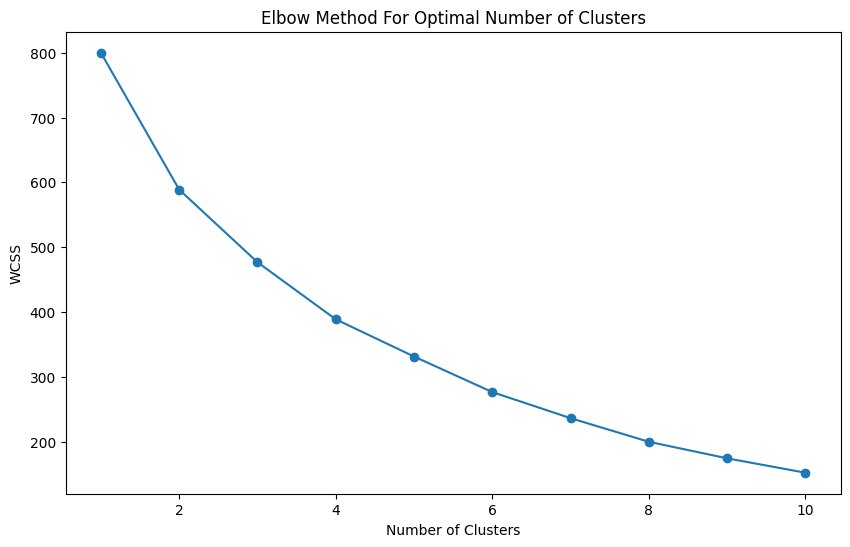

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [13]:
data['Cluster'] = clusters
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[-0.04339047 -0.44191719  0.99158305  1.23950275]
 [-0.0166722  -0.16988908  1.10528137 -1.25005425]
 [ 0.88640526  0.78684665 -0.43236199 -0.39327144]
 [ 0.06565965 -1.00061372 -0.79536608  0.42718095]
 [-1.12815215  1.21029396 -0.26238756 -0.5213181 ]]


In [14]:
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.30


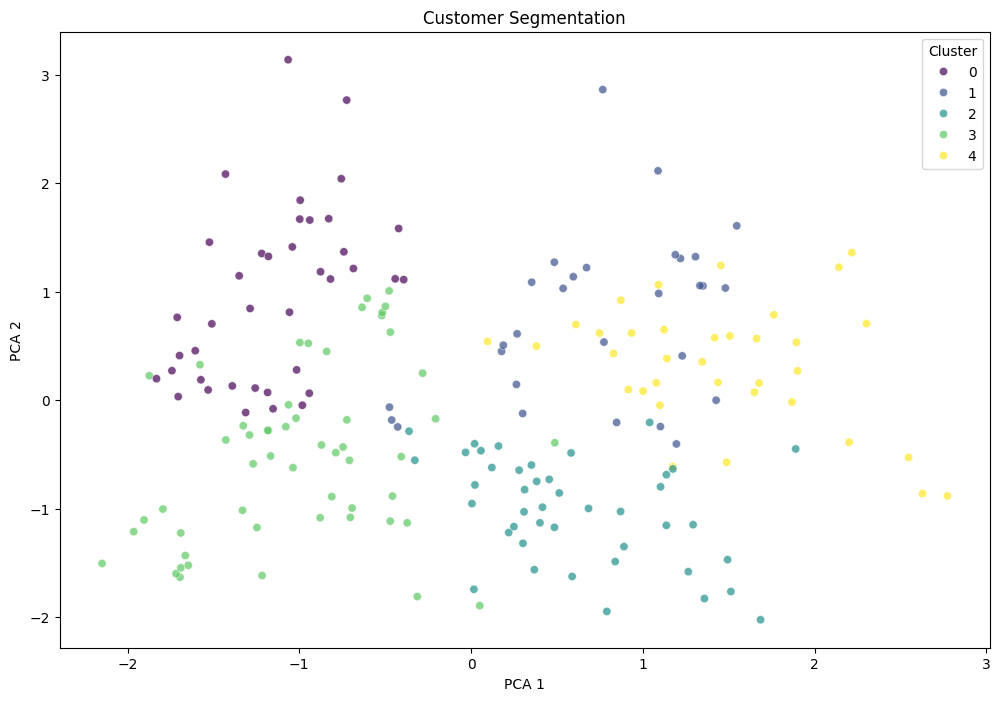

In [15]:
from sklearn.decomposition import PCA

# Reduce to 2D
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Customer Segmentation')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()
